In [10]:
from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Density-Based Spatial Clustering of Applications with Noise

* User does not require to set n_clusters
* Captures objects of complex shape
* Identifies noise
* DBSCAN can not predict for new data

#### Idea

* Identifies points in crowded/dense areas
* Data should be scaled with StandardScaler or MinMaxScaler
* Points within dense regions: **core samples**:
    * DBSCAN has 2 parameters: **min_samples** and **eps**
    * If a given data sample has min_samples in the vicinity of eps it is classified core sample and clustered into same cluster with these samples

#### Working Cycle:

1. Algorithm picks arbitrary data point
2. Counts the number of nearby data points within distance $eps$
3. If $n_{samples} >= \text{min_samples}$ the point is defined as core sample and assigned cluster label
3. If $n_{samples} < \text{min_samples}$ the point is defined as $noise$ and no cluster label is given to it
4. Algorithm proceeds checking initial data sample neighbors with eps vicinity condition

#### Eventually

* There can be 3 types of points:
    * Core samples
    * Boundry samples - samples in the distance $eps$ of core points
    * Noise
* $eps$ is somewhat more important - determining what means for points to be "close"
* $\text{min_samples}$ determines minimum cluster size

#### Use DBSCAN on Two Moons Dataset

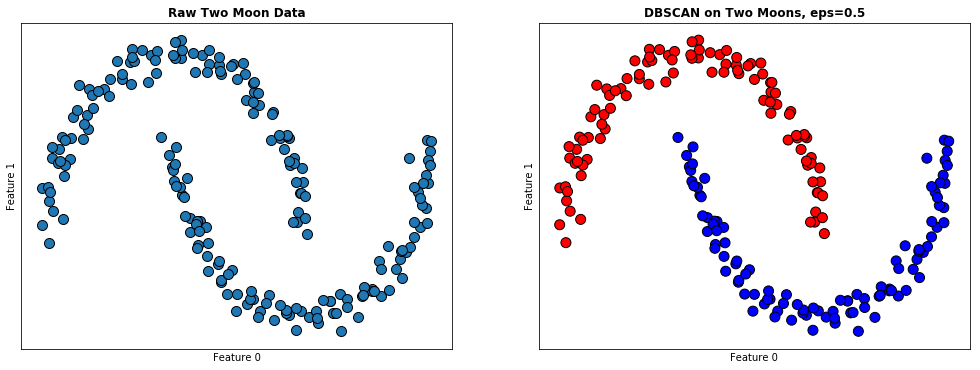

In [16]:
X, y = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN()
y_pred = dbscan.fit_predict(X_scaled)

rb = ListedColormap(['#FF0000', '#0000FF'])

# plot the moons and predicted labels
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], s=100, edgecolor='black')
plt.grid(False)
plt.xticks(())
plt.yticks(())
plt.title('Raw Two Moon Data', weight='bold')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.subplot(1,2,2)
plt.grid(False)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=rb, s=100, edgecolor='black')
plt.xticks(())
plt.yticks(())
plt.title('DBSCAN on Two Moons, eps=0.5', weight='bold')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()